In [2128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore") 

In [2129]:
df = pd.read_excel('../dataset.xlsx')

In [2130]:
df.head()

,ID,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,0,EUR 279000,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26
1,1,EUR 65000,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49
2,2,CHF 204000,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187
3,3,EUR 399000,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27
4,4,EUR 235000,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145


In [2131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7910 non-null   int64  
 1   Price                        7910 non-null   object 
 2   Boat Type                    7910 non-null   object 
 3   Manufacturer                 6824 non-null   object 
 4   Type                         7904 non-null   object 
 5   Year Built                   7910 non-null   int64  
 6   Length                       7905 non-null   float64
 7   Width                        7867 non-null   float64
 8   Material                     6522 non-null   object 
 9   Location                     7888 non-null   object 
 10  Number of views last 7 days  7910 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 679.9+ KB


In [2132]:
df.describe(include=[object])

,Price,Boat Type,Manufacturer,Type,Material,Location
count,7910,7910,6824,7904,6522,7888
unique,2747,114,826,23,11,2615
top,EUR 65000,Motor Yacht,BÃ©nÃ©teau power boats,"Used boat,Diesel",GRP,Netherlands Â» In verkoophaven
freq,63,2197,489,3315,4402,242


In [2133]:
df.describe()

,ID,Year Built,Length,Width,Number of views last 7 days
count,7910.000000,7910.000000,7905.000000,7867.000000,7910.000000
mean,3954.500000,1894.840202,11.580548,3.521548,150.048546
std,2283.564648,456.847589,6.084230,1.231082,154.485964
min,0.000000,0.000000,1.150000,0.010000,15.000000
25%,1977.250000,1996.000000,7.470000,2.540000,70.000000
50%,3954.500000,2007.000000,10.220000,3.320000,108.000000
75%,5931.750000,2017.000000,13.900000,4.250000,173.000000
max,7909.000000,2021.000000,100.000000,25.160000,3263.000000


# PROBLEM WITH THE DATA

In [2134]:
df.head()

,ID,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,0,EUR 279000,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26
1,1,EUR 65000,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49
2,2,CHF 204000,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187
3,3,EUR 399000,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27
4,4,EUR 235000,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145


In [2135]:
df.isna().sum()

ID                                0
Price                             0
Boat Type                         0
Manufacturer                   1086
Type                              6
Year Built                        0
Length                            5
Width                            43
Material                       1388
Location                         22
Number of views last 7 days       0
dtype: int64

<Axes: >

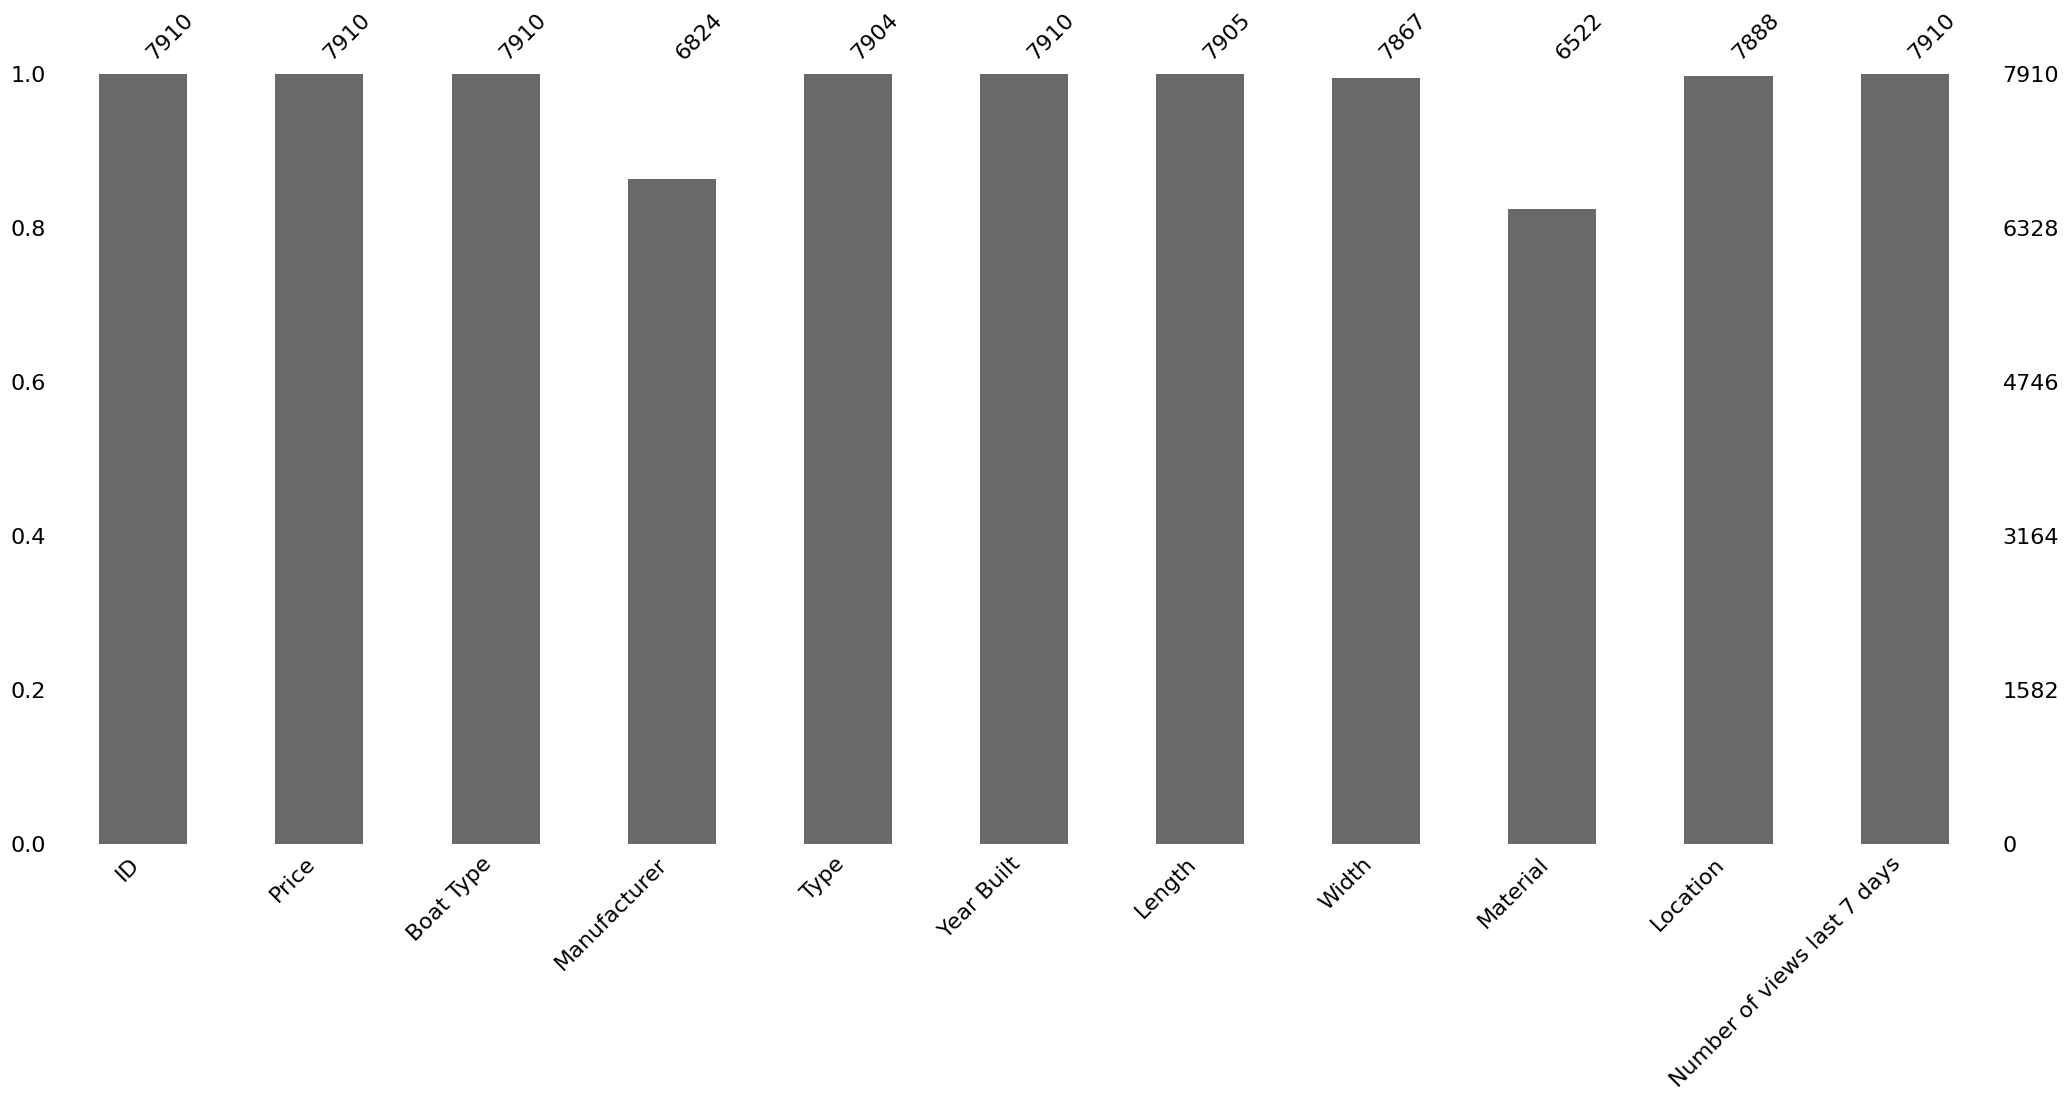

In [2136]:
import missingno as msno

msno.bar(df)

# Data Cleaning
### 1) Price
### 2) Location
### 3) Type


## PRICE

In [2137]:
df[['Currency', 'Price']] = df['Price'].str.split(' ', expand=True)
df["Price"]= df.Price.astype('float')

In [2138]:
cols = df.columns
df = df[['ID', 'Price', 'Currency', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Location',
       'Number of views last 7 days']]

In [2139]:
df.head()

,ID,Price,Currency,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,0,279000.0,EUR,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26
1,1,65000.0,EUR,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49
2,2,204000.0,CHF,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187
3,3,399000.0,EUR,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27
4,4,235000.0,EUR,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145


In [2140]:
df['Currency'].value_counts()

EUR    6749
CHF     790
Â£      230
DKK     141
Name: Currency, dtype: int64

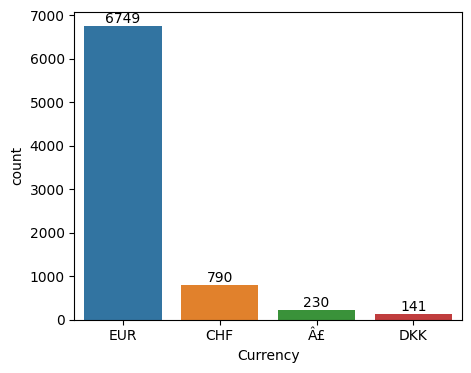

In [2141]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=df, x='Currency')
for container in ax.containers:
    ax.bar_label(container)

# most of the user live in countries in europe

In [2142]:
df['Price/USD'] = df['Price']
for index, row in df.iterrows():
    if row['Currency'] == 'EUR':
        df.at[index, 'Price/USD'] = row['Price'] * 1.08
    elif row['Currency'] == 'CHF':
        df.at[index, 'Price/USD'] = row['Price'] * 1.09
    elif row['Currency'] == 'Â£':
        df.at[index, 'Price/USD'] = row['Price'] * 1.21
    elif row['Currency'] == 'DKK':
        df.at[index, 'Price/USD'] = row['Price'] * 0.14

df.drop(columns='Currency', axis=1, inplace=True)
df.drop(columns='Price', axis=1, inplace=True)
df.drop(columns='ID', axis=1, inplace=True)


In [2143]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price/USD
0,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26,301320.0
1,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49,70200.0
2,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187,222360.0
3,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27,430920.0
4,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145,253800.0


## Type

In [2144]:
df[['Condition', 'Fuel Type']] = df['Type'].str.split(',' , expand=True)
df.drop(columns='Type', inplace=True)

In [2145]:
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price/USD,Condition,Fuel Type
0,Motor Yacht,Cayman power boats,2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26,301320.0,Used boat,Diesel
1,Pilothouse,Motomar power boats,2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49,70200.0,Used boat,Diesel
2,Fishing Boat,Ocean Master (US) power boats,2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187,222360.0,Display Model,Diesel
3,Motor Yacht,NaN,2006,18.87,4.90,GRP,Croatia (Hrvatska),27,430920.0,Used boat,Diesel
4,Flybridge,Azimut power boats,2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145,253800.0,Used boat,Diesel


In [2146]:
df['Condition'].value_counts()

Used boat              5880
new boat from stock    1633
new boat on order       230
Display Model            96
Diesel                   45
Unleaded                 19
Electric                  1
Name: Condition, dtype: int64

In [2147]:
df['Condition'].replace(to_replace=['Display Model', 'Diesel', 'Unleaded', 'Electric'],
                         value=['Used boat','Used boat','Used boat', 'Used boat'],
                         inplace=True)
df['Condition'].value_counts()

Used boat              6041
new boat from stock    1633
new boat on order       230
Name: Condition, dtype: int64

<Axes: xlabel='Condition', ylabel='Number of views last 7 days'>

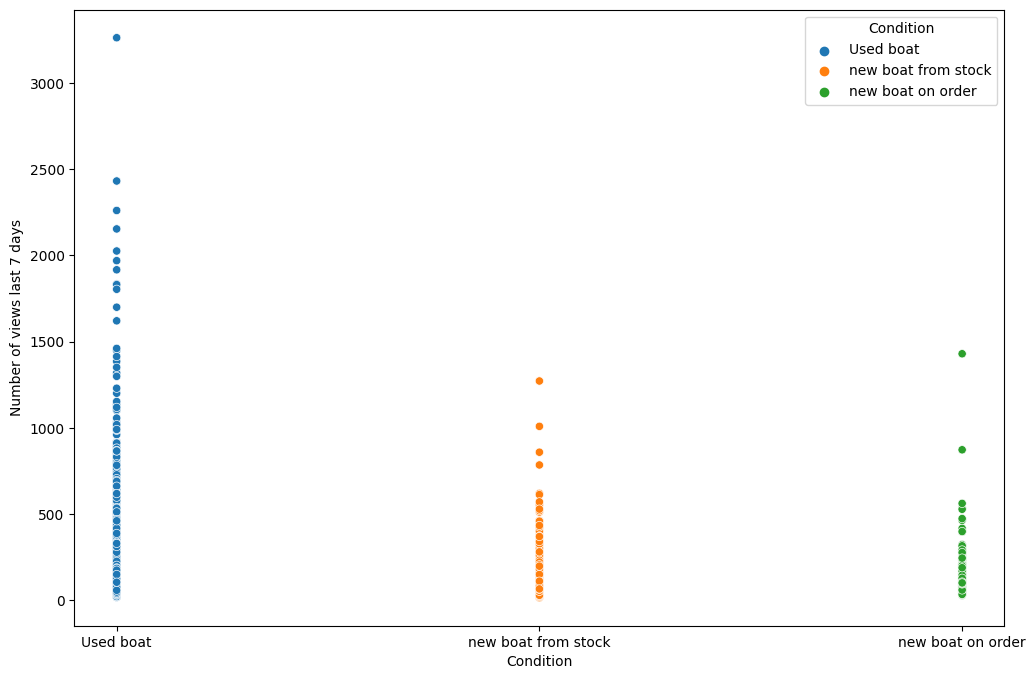

In [2148]:
sns.scatterplot(data=df, x=df['Condition'], y='Number of views last 7 days', hue=df['Condition'])

In [2149]:
df.replace(to_replace=['new boat from stock', 'new boat on order', 'Used boat'],
                         value=['New', 'New', 'Used'],
                         inplace=True)

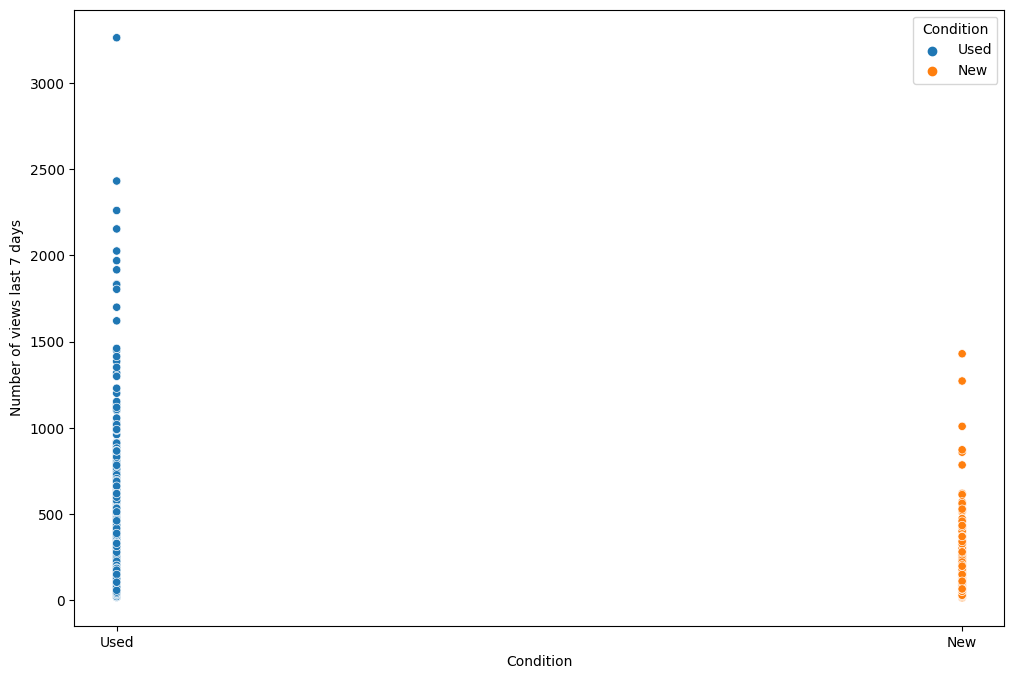

In [2150]:
sns.scatterplot(data=df, x=df['Condition'], y='Number of views last 7 days', hue=df['Condition'])
plt.show()

In [2151]:
df['Fuel Type'].value_counts()

Diesel      3606
Unleaded    2423
Electric      41
Gas            9
Hybrid         2
Propane        1
Name: Fuel Type, dtype: int64

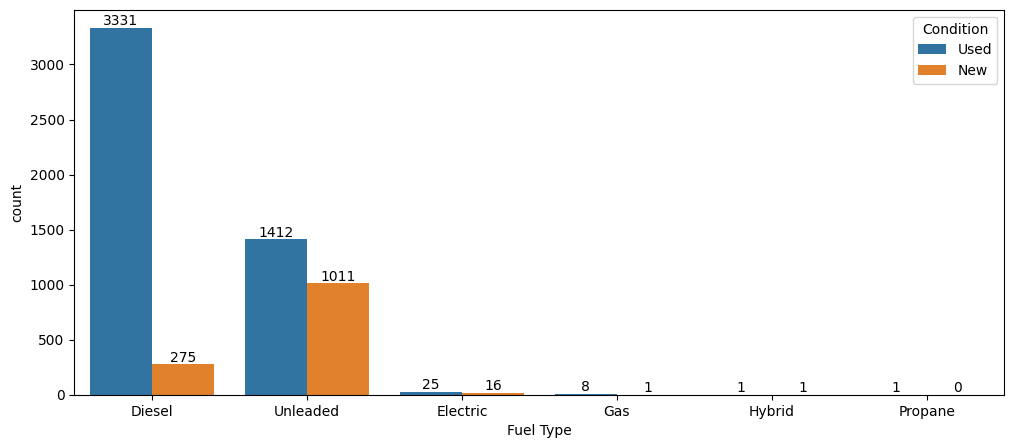

In [2152]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='Fuel Type', hue='Condition')
for container in ax.containers:
    ax.bar_label(container)

In [2153]:
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price/USD,Condition,Fuel Type
0,Motor Yacht,Cayman power boats,2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26,301320.0,Used,Diesel
1,Pilothouse,Motomar power boats,2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49,70200.0,Used,Diesel
2,Fishing Boat,Ocean Master (US) power boats,2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187,222360.0,Used,Diesel
3,Motor Yacht,NaN,2006,18.87,4.90,GRP,Croatia (Hrvatska),27,430920.0,Used,Diesel
4,Flybridge,Azimut power boats,2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145,253800.0,Used,Diesel


## LOCATION

In [2154]:
df['Location'].head()

0             Croatia (Hrvatska) Â» Split
1             Italy Â» Toscana Â» Toscana
2    Switzerland Â» Luganersee Â» Bioggio
3                      Croatia (Hrvatska)
4             Italy Â» Liguria Â» Liguria
Name: Location, dtype: object

In [2155]:
df[['Country', 'City1', 'City2']] = df['Location'].str.split(' Â» ', expand=True)
df.drop(['City2'], axis=1, inplace=True)
df.drop(['Location'], axis=1, inplace=True)

In [2156]:
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Number of views last 7 days,Price/USD,Condition,Fuel Type,Country,City1
0,Motor Yacht,Cayman power boats,2007,17.00,4.65,GRP,26,301320.0,Used,Diesel,Croatia (Hrvatska),Split
1,Pilothouse,Motomar power boats,2008,9.30,3.20,GRP,49,70200.0,Used,Diesel,Italy,Toscana
2,Fishing Boat,Ocean Master (US) power boats,2002,9.80,3.00,GRP,187,222360.0,Used,Diesel,Switzerland,Luganersee
3,Motor Yacht,NaN,2006,18.87,4.90,GRP,27,430920.0,Used,Diesel,Croatia (Hrvatska),None
4,Flybridge,Azimut power boats,2006,14.65,4.36,GRP,145,253800.0,Used,Diesel,Italy,Liguria


In [2157]:
print(df['Country'].nunique())

112


### What if the data contains Italy and italy?

In [2158]:
df['Country'] = df['Country'].str.lower()
print(df['Country'].str.lower().nunique())

111


In [2159]:
df['Country'] = df['Country'].str.title()

In [2160]:
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Number of views last 7 days,Price/USD,Condition,Fuel Type,Country,City1
0,Motor Yacht,Cayman power boats,2007,17.00,4.65,GRP,26,301320.0,Used,Diesel,Croatia (Hrvatska),Split
1,Pilothouse,Motomar power boats,2008,9.30,3.20,GRP,49,70200.0,Used,Diesel,Italy,Toscana
2,Fishing Boat,Ocean Master (US) power boats,2002,9.80,3.00,GRP,187,222360.0,Used,Diesel,Switzerland,Luganersee
3,Motor Yacht,NaN,2006,18.87,4.90,GRP,27,430920.0,Used,Diesel,Croatia (Hrvatska),None
4,Flybridge,Azimut power boats,2006,14.65,4.36,GRP,145,253800.0,Used,Diesel,Italy,Liguria


In [2161]:
df['Country'].value_counts()

Germany                        1556
Italy                          1439
France                          987
Switzerland                     887
Netherlands                     845
                               ... 
Brandenburg                       1
Espa?A                            1
French Southern Territories       1
Gibraltar                         1
Croatia                           1
Name: Country, Length: 111, dtype: int64

In [2162]:
lst = ['?', '(']

for i in lst:
    df[['Country', 'Special Character']] = df['Country'].str.split(i, expand=True)
df.drop(['Special Character'], axis=1, inplace=True)


In [2163]:
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Number of views last 7 days,Price/USD,Condition,Fuel Type,Country,City1
0,Motor Yacht,Cayman power boats,2007,17.00,4.65,GRP,26,301320.0,Used,Diesel,Croatia,Split
1,Pilothouse,Motomar power boats,2008,9.30,3.20,GRP,49,70200.0,Used,Diesel,Italy,Toscana
2,Fishing Boat,Ocean Master (US) power boats,2002,9.80,3.00,GRP,187,222360.0,Used,Diesel,Switzerland,Luganersee
3,Motor Yacht,NaN,2006,18.87,4.90,GRP,27,430920.0,Used,Diesel,Croatia,None
4,Flybridge,Azimut power boats,2006,14.65,4.36,GRP,145,253800.0,Used,Diesel,Italy,Liguria


In [2164]:
# !pip install pycountry
import pycountry

countries = []
for country in pycountry.countries:
    countries.append(country.name.translate('en'))

un = list(set(countries) & set(df['Country']))
print(len(un))
print(sorted(un))
# length of all the valid countries present in df['Country'] =====> they are unique values

44
['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France', 'French Southern Territories', 'Germany', 'Gibraltar', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Jersey', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Malta', 'Martinique', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Russian Federation', 'Serbia', 'Seychelles', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']


In [2165]:
un = [item.replace(' ', '') for item in un]
df['Country'] = df['Country'].str.replace(' ', '')

# removed spaces from both un and data set to make them similar

In [2166]:
not_in_un = list()
for row in df['Country']:
    if row not in un:
        not_in_un.append(row)
not_in_un = pd.DataFrame(not_in_un)
not_in_un.value_counts()

LakeConstance             9
SlovakRepublic            9
LakeGeneva                5
CzechRepublic             3
LagoMaggiore              2
                         ..
JuelsmindeHavn            1
Katwijk                   1
KroatienKrk               1
LagoDiGarda               1
Zã¼Richse,8855WangenSz    1
Length: 66, dtype: int64

In [2167]:
import itertools

for row, index in itertools.zip_longest(df['Country'], df.index):
    if row not in un:
        df['Country'][index] = 'Unknown'

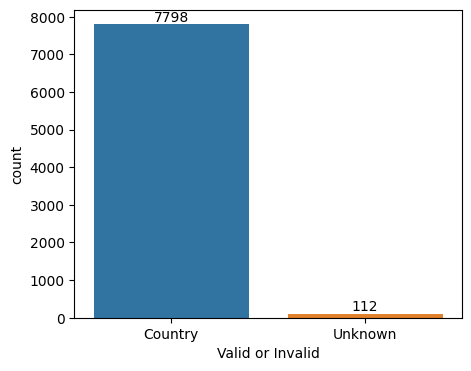

In [2168]:
comp = list()
for i in df['Country']:
    if i == 'Unknown':
        comp.append('Unknown')
    else:
        comp.append('Country')

comp = pd.DataFrame(comp)
plt.figure(figsize=(5, 4))
ax = sns.countplot(data=comp, x=comp[0])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Valid or Invalid')
plt.show()
# in dataset how many countries are actually valid (Country) and invalid (Unknown)

In [2169]:
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Number of views last 7 days,Price/USD,Condition,Fuel Type,Country,City1
0,Motor Yacht,Cayman power boats,2007,17.00,4.65,GRP,26,301320.0,Used,Diesel,Croatia,Split
1,Pilothouse,Motomar power boats,2008,9.30,3.20,GRP,49,70200.0,Used,Diesel,Italy,Toscana
2,Fishing Boat,Ocean Master (US) power boats,2002,9.80,3.00,GRP,187,222360.0,Used,Diesel,Switzerland,Luganersee
3,Motor Yacht,NaN,2006,18.87,4.90,GRP,27,430920.0,Used,Diesel,Croatia,None
4,Flybridge,Azimut power boats,2006,14.65,4.36,GRP,145,253800.0,Used,Diesel,Italy,Liguria


In [2170]:
df.shape

(7910, 12)

In [2171]:
categorical_cols = df.select_dtypes(include=['category','object']).columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [2172]:
numeric_cols = list(numeric_cols)
numeric_cols

['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'Price/USD']

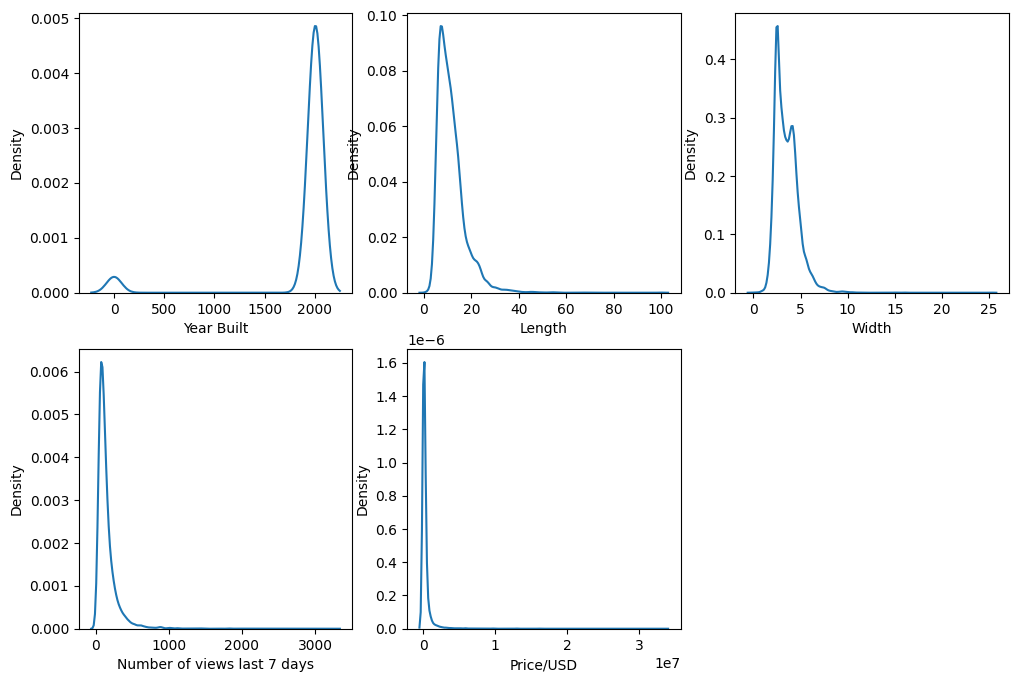

In [2173]:
for col, i in zip(numeric_cols, range(len(numeric_cols))):
    plt.subplot(2,3,i+1)
    sns.kdeplot(data=df, x=col)
plt.show()

### Removing Outliers

In [2174]:
categorical_cols = df.select_dtypes(include=['category','object']).columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

print(categorical_cols)
print(numeric_cols)

Index(['Boat Type', 'Manufacturer', 'Material', 'Condition', 'Fuel Type',
       'Country', 'City1'],
      dtype='object')
Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'Price/USD'],
      dtype='object')


##### If our data is skewed we will opt for IQR method
##### If our data is normally distributed we will opt for standard deviation method

In [2175]:
for i in list(numeric_cols):
    print(i, df[i].skew())

Year Built -3.90238737484542
Length 2.8950200186325867
Width 1.9614856208125713
Number of views last 7 days 5.638740204324166
Price/USD 13.680844441178516


#### The skewness shows that the data is NOT normally distributed, lets visualize this

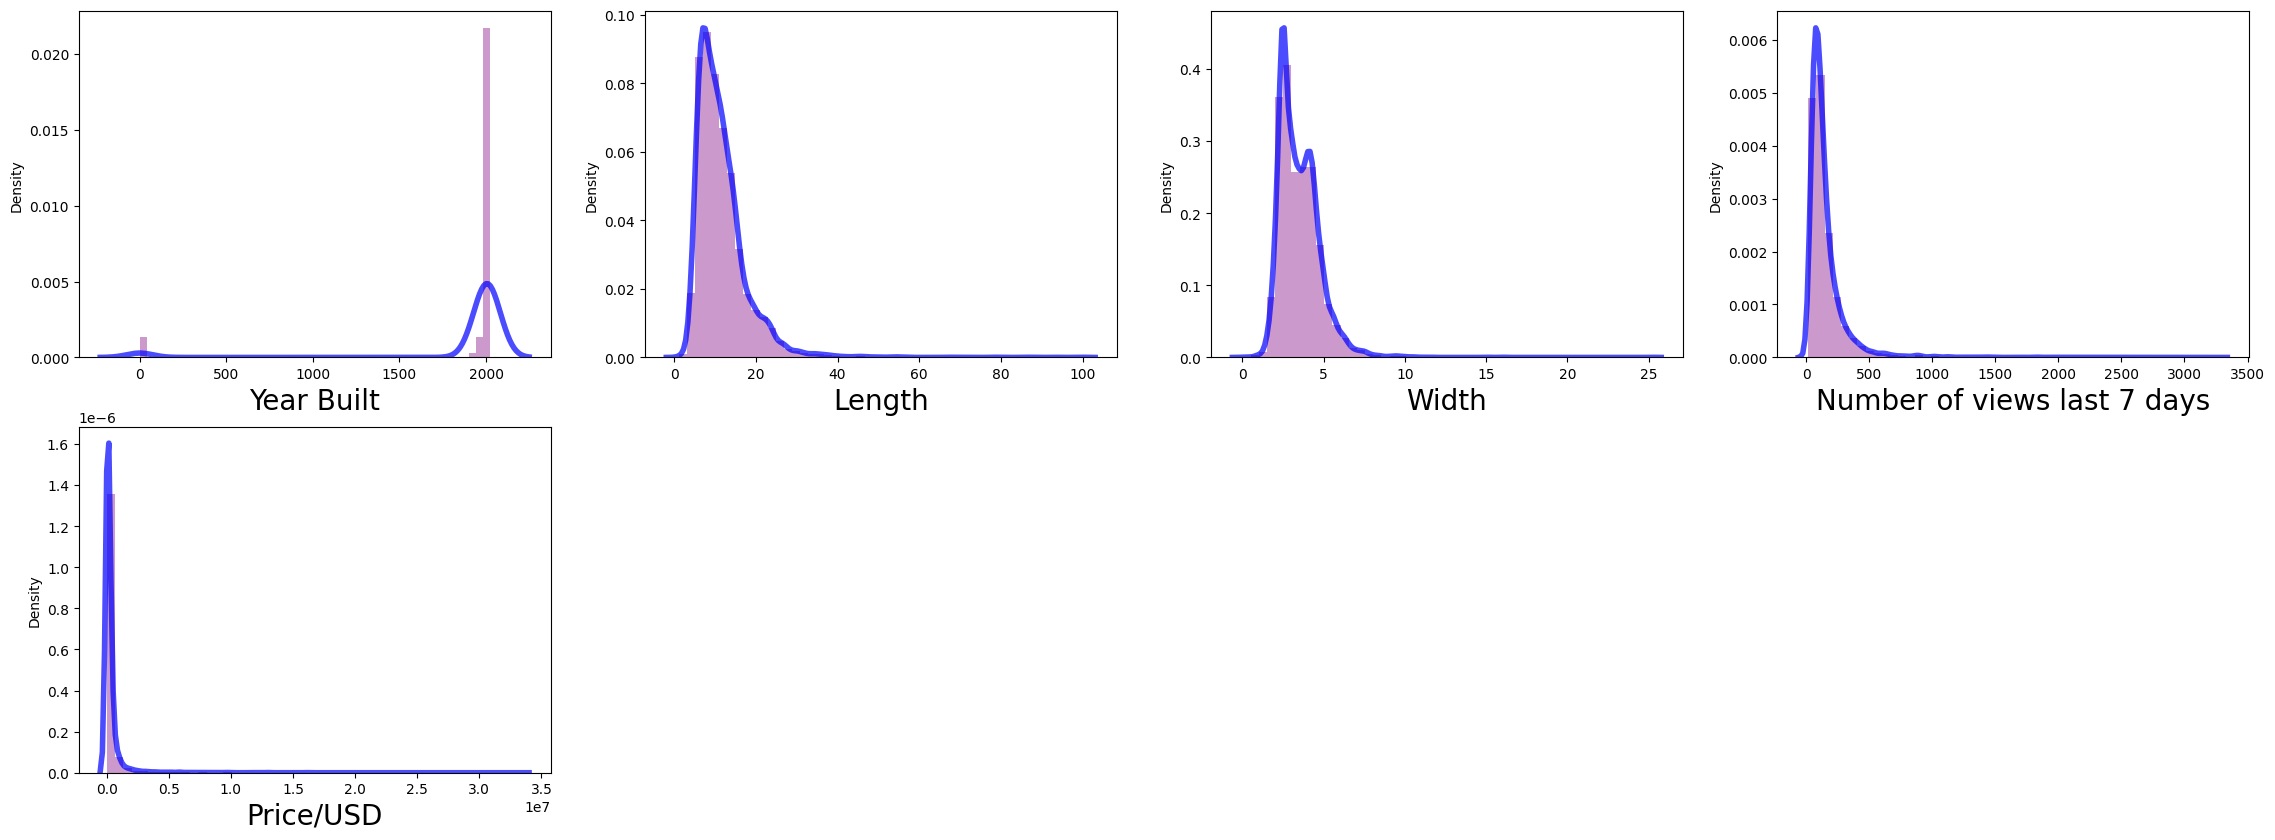

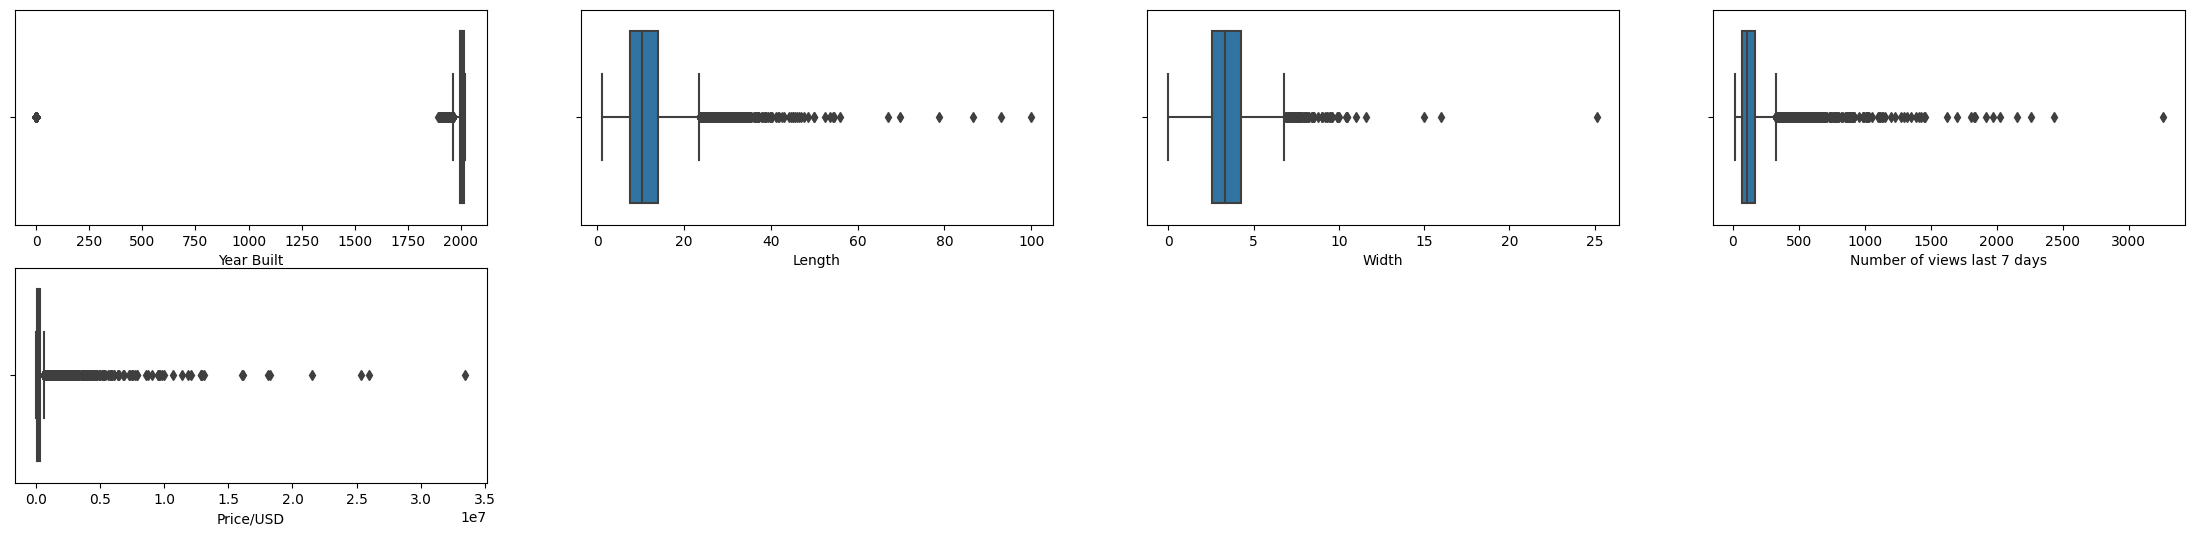

In [2176]:
def draw_boxplot(df,numeric_columns):
    plt.figure(figsize=(28,100))
    plotnumber=1
    for i in numeric_columns:
        ax=plt.subplot(30,4,plotnumber)
        sns.boxplot(x=i, data=df) 
        plt.xlabel(i)
    #     plt.xticks(rotation=70, size = 15)
        plotnumber+=1
    plt.show()     
def draw_dist(df,numeric_columns):   
    plt.figure(figsize=(28,80))
    plotnumber=1
    for i in numeric_columns:
        ax=plt.subplot(15,4,plotnumber)
        sns.distplot(x=df[i], color = 'purple', kde_kws={"color": "blue", "linewidth": 4, "label": "KDE", 'alpha':0.7})
    #     plt.title(i)
        plt.xlabel(i, size = 20)
    #     plt.xticks(rotation=70)
        plotnumber+=1
    plt.show()

draw_dist(df, numeric_cols)
draw_boxplot(df, numeric_cols)

In [2177]:
for name in numeric_cols:
    percentile25 = df[name].quantile(0.25)
    percentile75 = df[name].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[name] = np.where(
    df[name]>upper_limit,
    upper_limit,
    np.where(
        df[name]<lower_limit,
        lower_limit,
        df[name]
    )
)

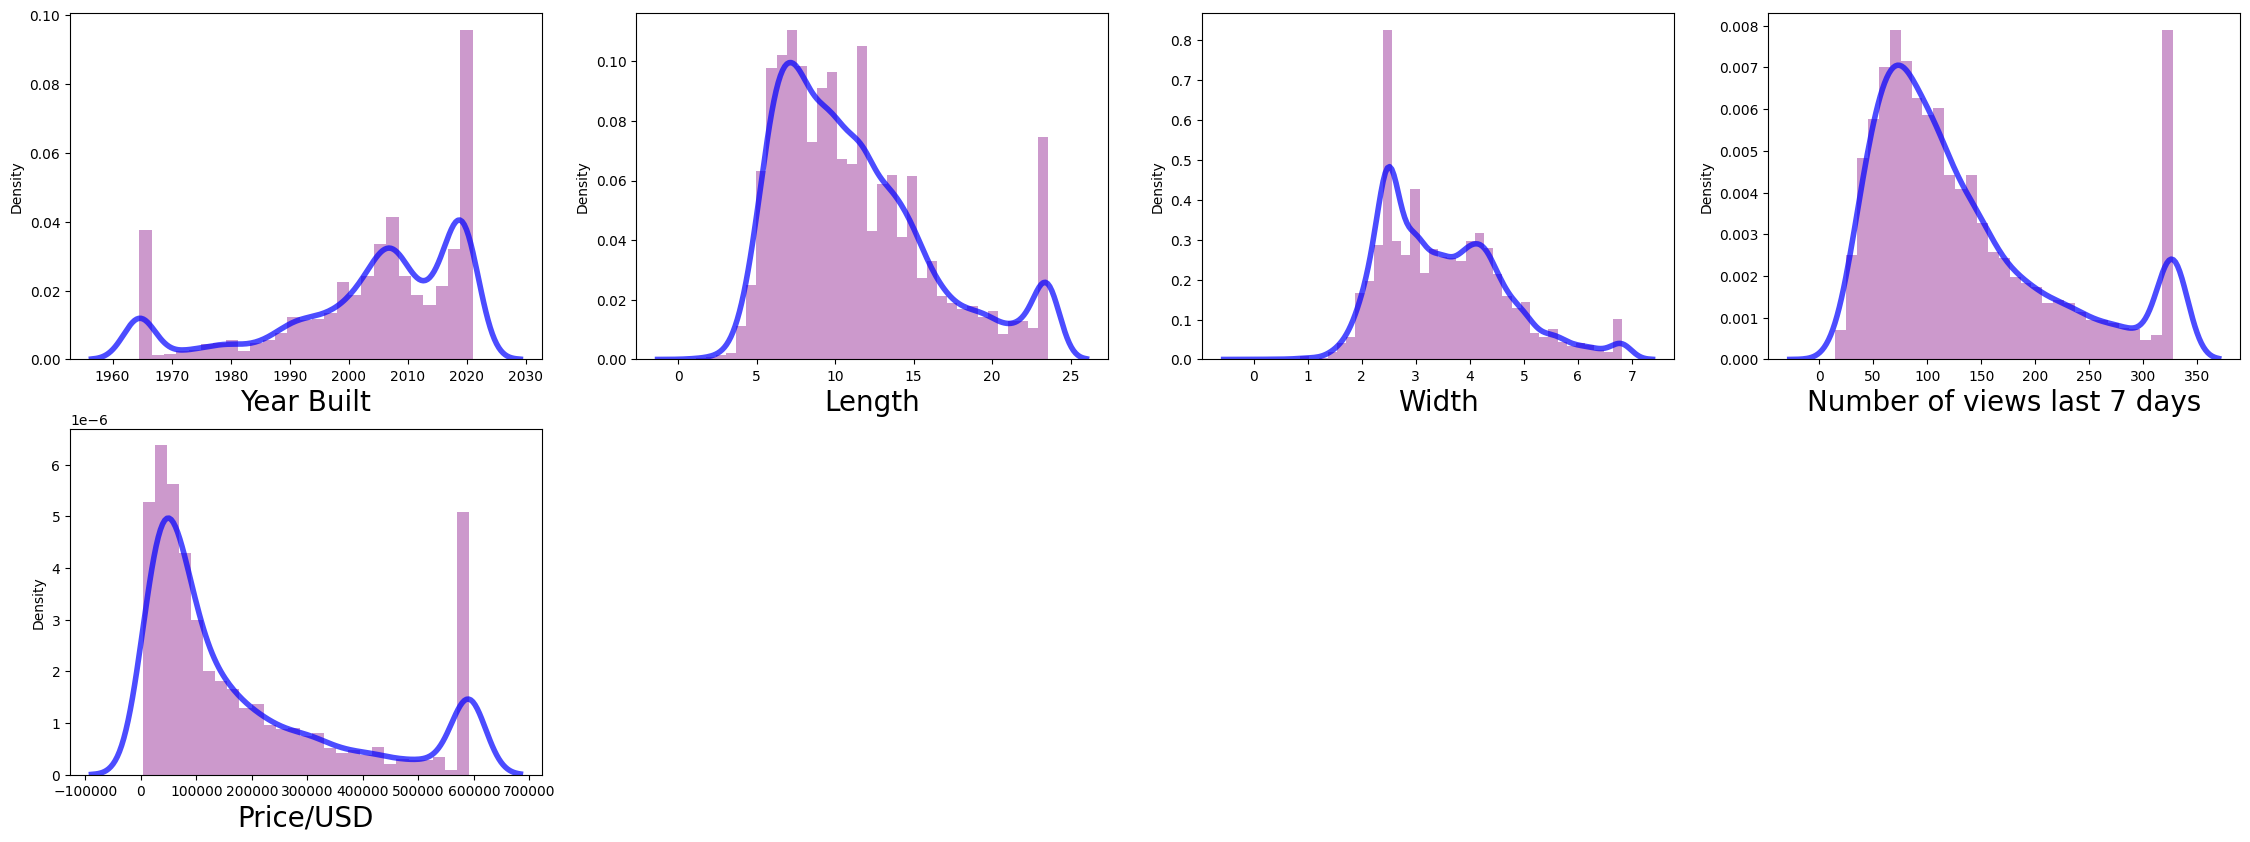

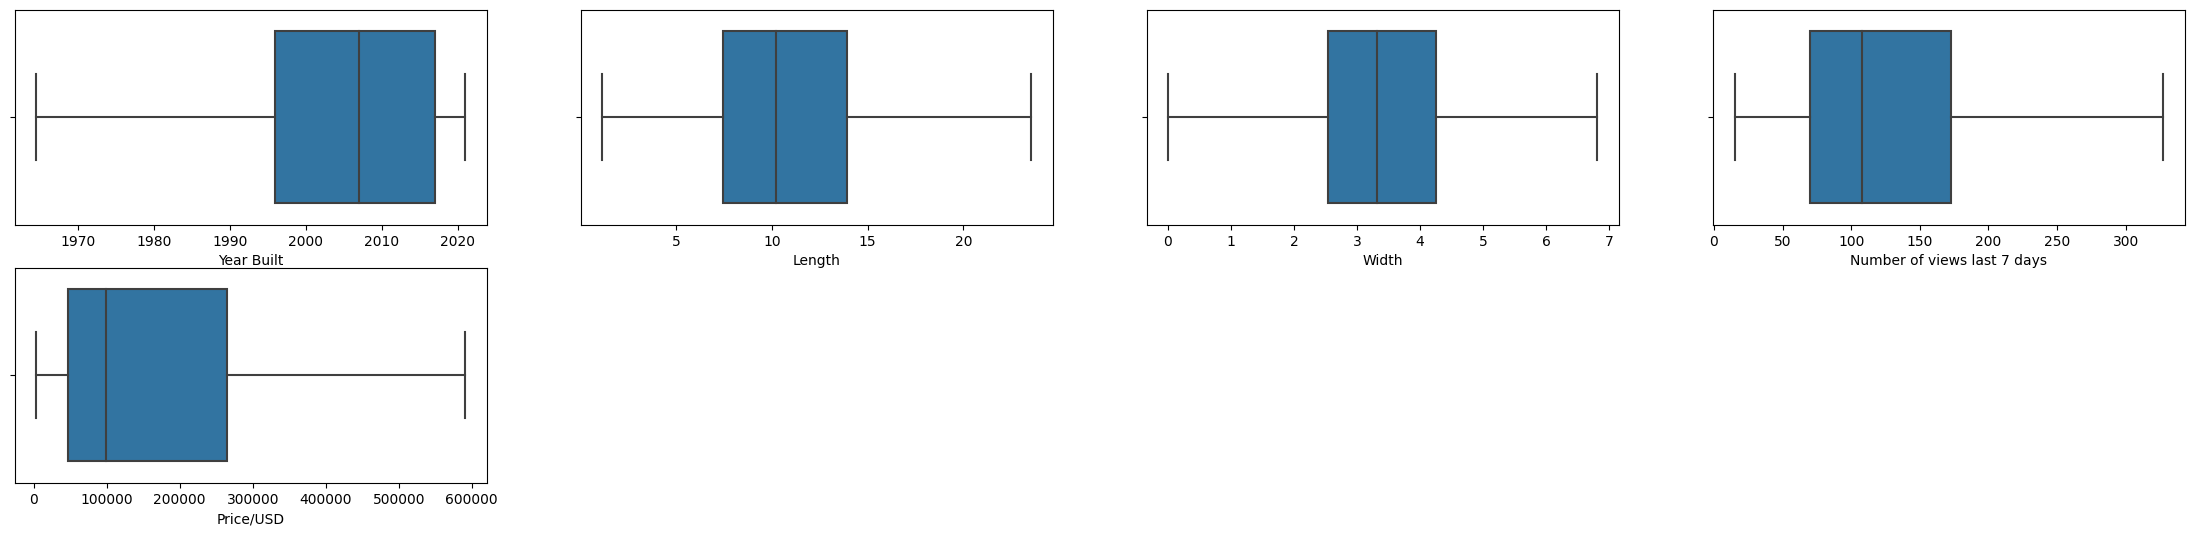

In [2178]:
draw_dist(df, numeric_cols)
draw_boxplot(df, numeric_cols)

#### Missing: Fuel Type, Material, Manufacturer, City1, Width, Condition, Length

In [2179]:
df.isna().sum().sort_values(ascending=False)

Fuel Type                      1828
Material                       1388
Manufacturer                   1086
City1                           756
Width                            43
Condition                         6
Length                            5
Boat Type                         0
Year Built                        0
Number of views last 7 days       0
Price/USD                         0
Country                           0
dtype: int64

##### since length, condtion and Width have few number of missing values we can use mean and mode to fill them

In [2180]:
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Width'].fillna(df['Width'].mean(), inplace=True)
df['Condition'].fillna(df['Condition'].mode()[0], inplace=True)

In [2181]:
df.isna().sum().sort_values(ascending=False)

Fuel Type                      1828
Material                       1388
Manufacturer                   1086
City1                           756
Boat Type                         0
Year Built                        0
Length                            0
Width                             0
Number of views last 7 days       0
Price/USD                         0
Condition                         0
Country                           0
dtype: int64

#### Manufacturer                   1086

In [2182]:
manufacture_data = df['Manufacturer'].value_counts().sort_values(ascending=False).head(6).reset_index()

In [2183]:
# ax = sns.barplot(data=manufacture_data, x='index', y='Manufacturer')
# plt.xticks(rotation=45)
# plt.xlabel('Manufacturer')
# plt.ylabel('Manufacturer Count')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show()

In [2184]:
# manu_most = manufacture_data['index']
# df['Manufacturer'] = df['Manufacturer'].apply(lambda x: random.choice(manu_most) if pd.isnull(x) else x)
df['Manufacturer'].fillna(df['Manufacturer'].mode(),inplace=True)

In [2185]:
manufacture_data = df['Manufacturer'].value_counts().sort_values(ascending=False).head(6).reset_index()
# ax = sns.barplot(data=manufacture_data, x='index', y='Manufacturer')
# plt.xticks(rotation=45)
# plt.xlabel('Manufacturer')
# plt.ylabel('Manufacturer Count')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.show()
# Manufactuer fixed

#### Fuel Type missing 1828

In [2186]:
fuel_most = df['Fuel Type'].value_counts().sort_values(ascending=False).head(3).reset_index()
fuel_most = fuel_most['index']
fuel_most

0      Diesel
1    Unleaded
2    Electric
Name: index, dtype: object

In [2187]:
# df['Fuel Type'] = df['Fuel Type'].apply(lambda x: random.choice(fuel_most) if pd.isnull(x) else x)
df['Fuel Type'].fillna(df['Fuel Type'].mode(),inplace=True)

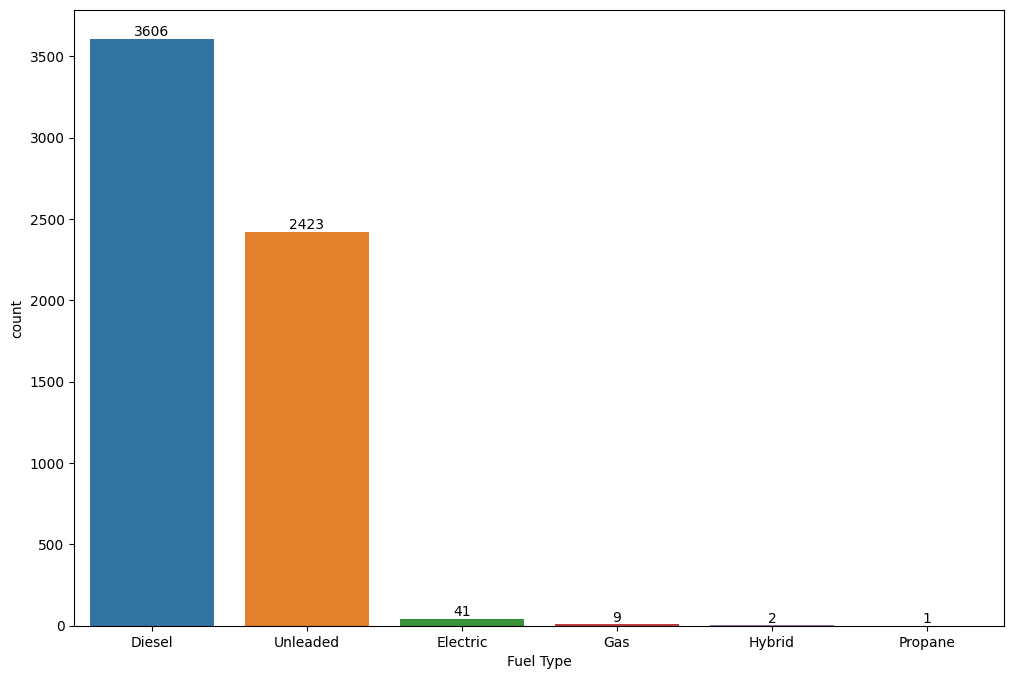

In [2188]:
ax = sns.countplot(data=df, x='Fuel Type')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Material missing 1388

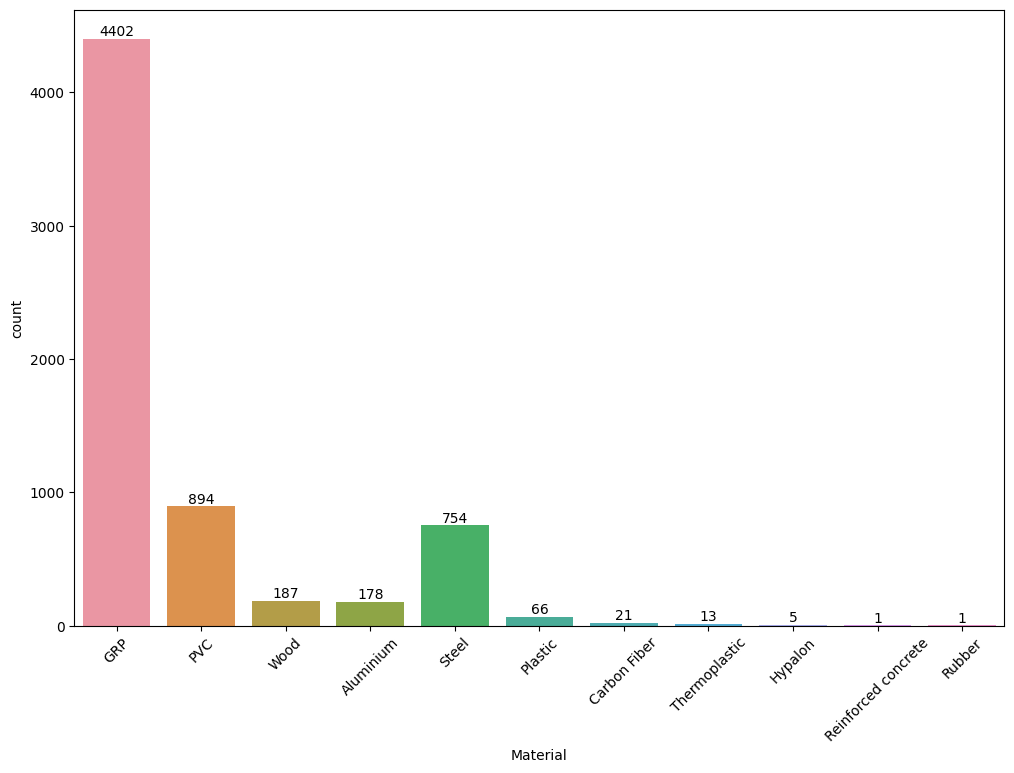

In [2189]:
ax = sns.countplot(data=df, x='Material')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()
# since class imbalance, we will use mode to fill na values in Material

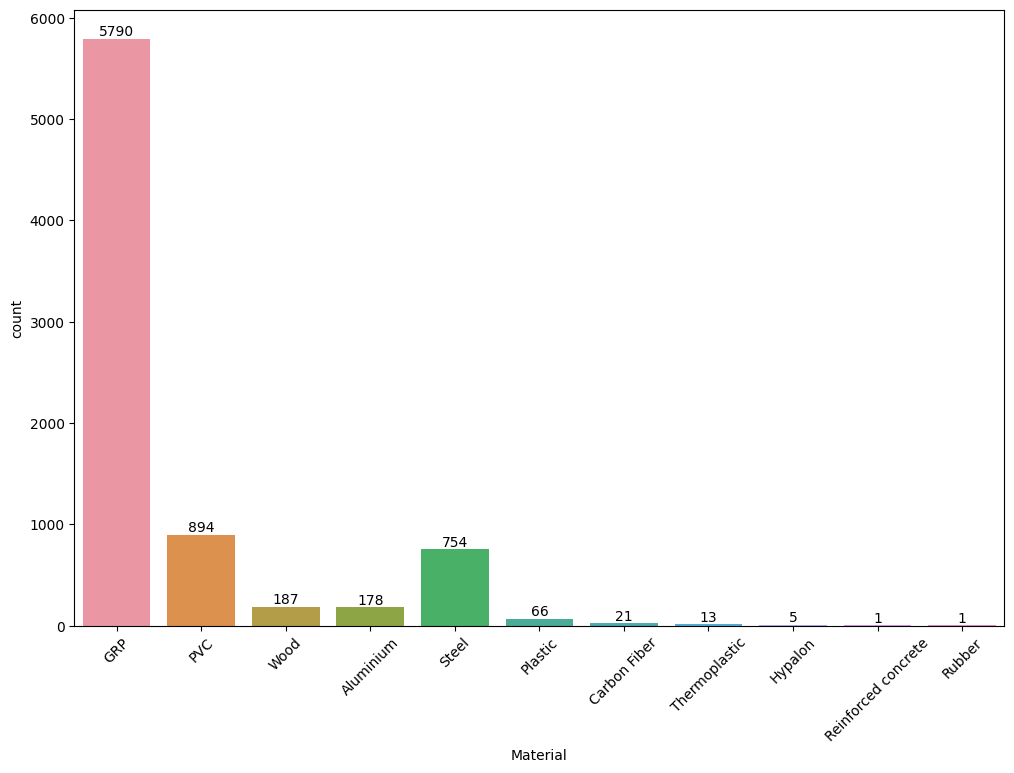

In [2190]:
df['Material'].fillna(df['Material'].mode()[0], inplace=True)
ax = sns.countplot(data=df, x='Material')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()
# material fixed

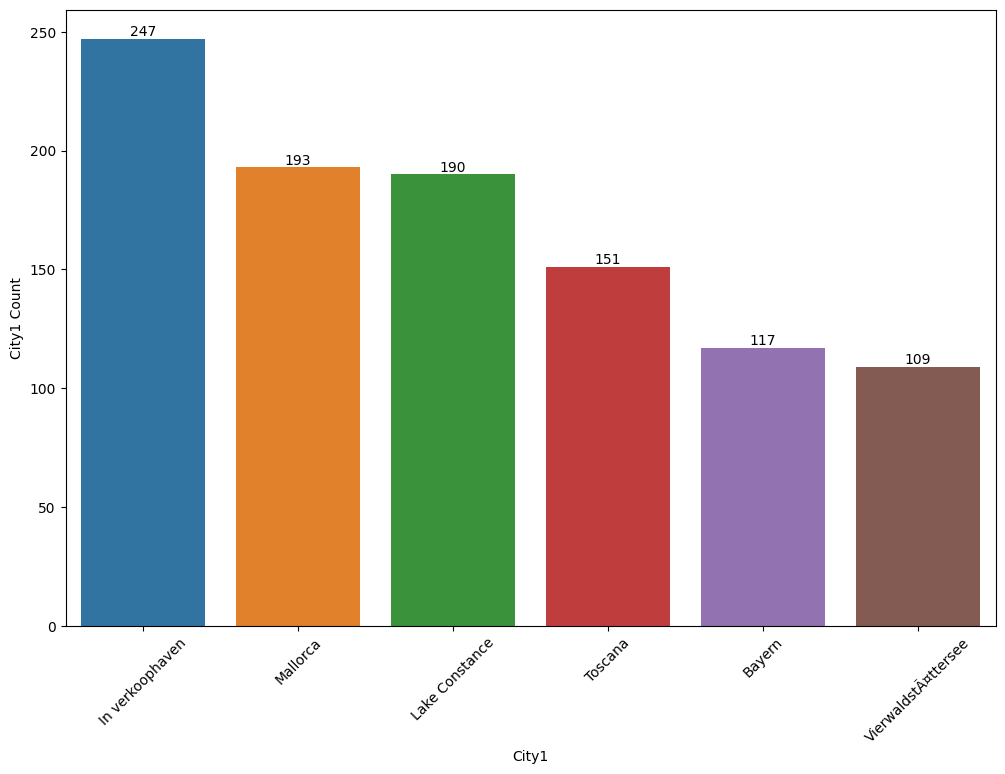

In [2191]:
most_cities = df['City1'].value_counts().sort_values(ascending=False).head(6).reset_index()
ax = sns.barplot(data=most_cities, x='index', y='City1')
plt.xticks(rotation=45)
plt.xlabel('City1')
plt.ylabel('City1 Count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()
# make missing cities as unknown

In [2192]:
df['City1'].fillna("unknown", inplace=True)

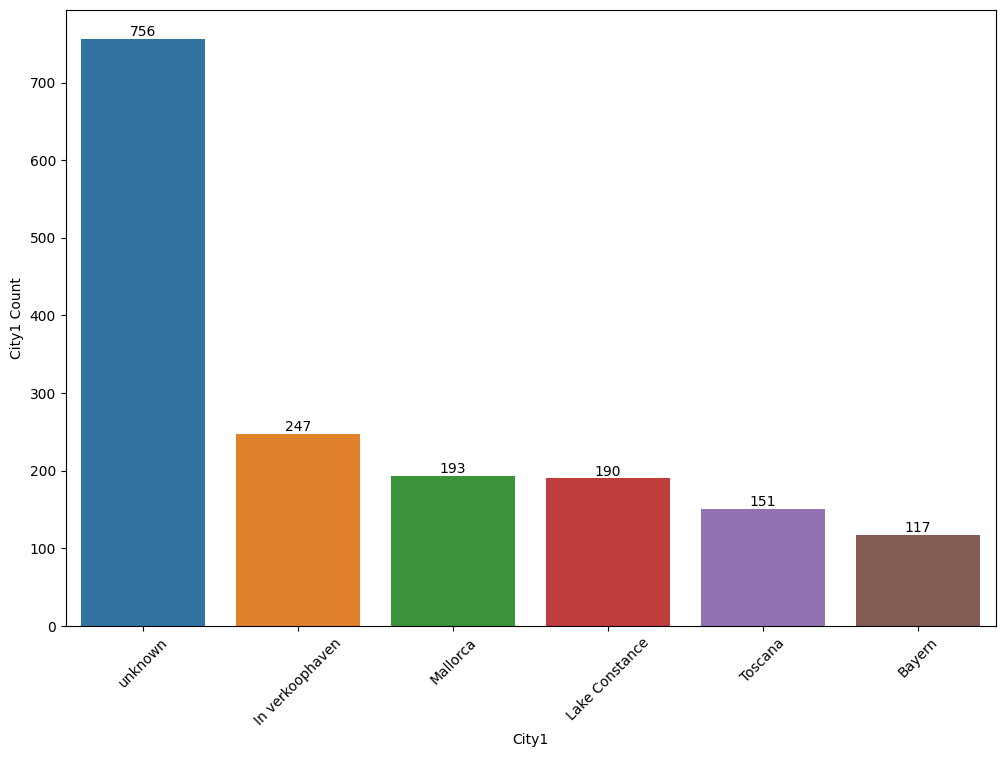

In [2193]:
most_cities = df['City1'].value_counts().sort_values(ascending=False).head(6).reset_index()
ax = sns.barplot(data=most_cities, x='index', y='City1')
plt.xticks(rotation=45)
plt.xlabel('City1')
plt.ylabel('City1 Count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()
# City 1 fixed

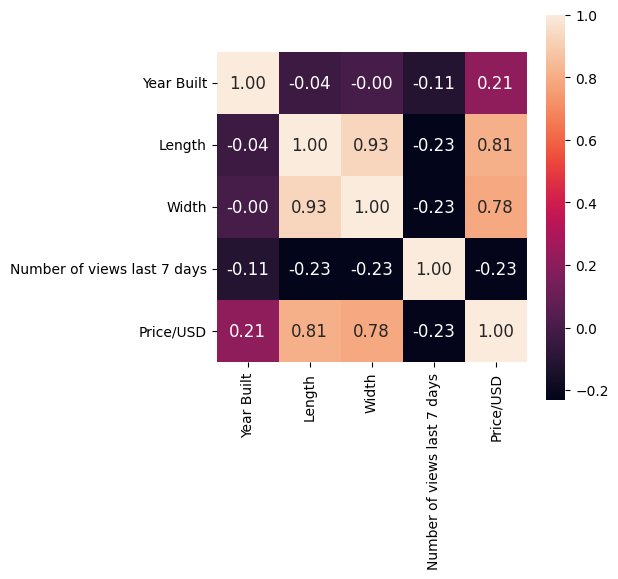

In [2194]:
plt.figure(figsize=(5,5))
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':12})
plt.show()

##### Problem:  Multicollinearity
##### Solution: <ul>
  <li>Remove one of the highly correlated features</li>
  <li>Combine highly correlated features to make a new features</li>
  <li>Collect more data</li>
  <li>Regularization Techniques</li>
</ul>

In [2195]:
df['Area'] = df['Length']*df['Width']
df.drop(["Width","Length"],axis=1,inplace=True)

In [2196]:
# df['Area to Price'] = df['Area']/df['Price/USD']
# df.drop(['Area', 'Price/USD'], axis=1, inplace=True)

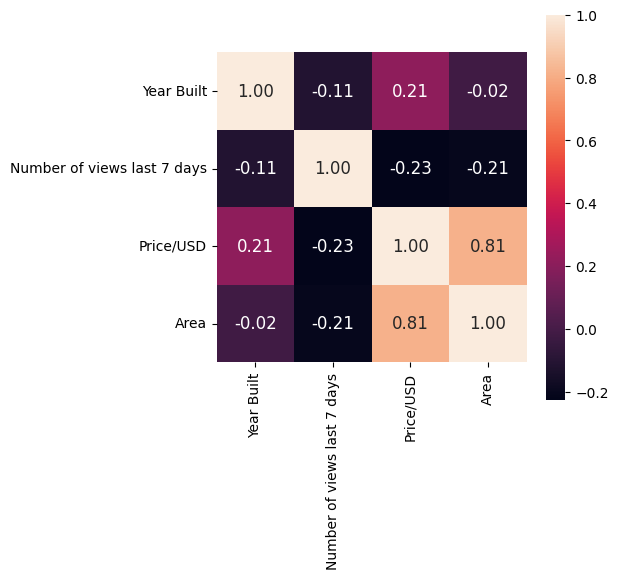

In [2197]:
plt.figure(figsize=(5,5))
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':12})
plt.show()

In [2198]:
# plt.figure(figsize=(10,3))

# sns.scatterplot(data=df, y='Area to Price', x='Number of views last 7 days')
# plt.show()

In [2199]:
categorical_cols = df.select_dtypes(include=['category','object']).columns

In [2200]:
for col in categorical_cols:
    index=df[col].value_counts().sort_values(ascending=False).head(10).index
    index=list(index)
    df[col] = df[col].apply(lambda x: x if x in index else 'other')

In [2201]:
df['Year Built'] = df['Year Built'].astype('int64')
df['Number of views last 7 days'] = df['Number of views last 7 days'].astype('int64')

df.head()

,Boat Type,Manufacturer,Year Built,Material,Number of views last 7 days,Price/USD,Condition,Fuel Type,Country,City1,Area
0,Motor Yacht,other,2007,GRP,26,301320.0,Used,Diesel,Croatia,other,79.050
1,Pilothouse,other,2008,GRP,49,70200.0,Used,Diesel,Italy,Toscana,29.760
2,other,other,2002,GRP,187,222360.0,Used,Diesel,Switzerland,other,29.400
3,Motor Yacht,other,2006,GRP,27,430920.0,Used,Diesel,Croatia,unknown,92.463
4,Flybridge,Azimut power boats,2006,GRP,145,253800.0,Used,Diesel,Italy,other,63.874


In [2202]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Year Built', 'Material',
       'Number of views last 7 days', 'Price/USD', 'Condition', 'Fuel Type',
       'Country', 'City1', 'Area'],
      dtype='object')

In [2203]:
# df.drop(columns=['City1', 'Country'], inplace=True)

In [2204]:
categorical_cols = df.select_dtypes(include=['category','object']).columns

In [2205]:
cols = categorical_cols
df = pd.get_dummies(df, columns=cols ,drop_first=True)

In [2206]:
df.head()

,Year Built,Number of views last 7 days,Price/USD,Area,Boat Type_Cabin Boat,Boat Type_Center console boat,Boat Type_Deck Boat,Boat Type_Flybridge,Boat Type_Hardtop,Boat Type_Motor Yacht,...,City1_Berlin,City1_In verkoophaven,City1_Lake Constance,City1_Lake of Zurich,City1_Mallorca,City1_Mar Tirreno,City1_Toscana,City1_VierwaldstÃ¤ttersee,City1_other,City1_unknown
0,2007,26,301320.0,79.050,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2008,49,70200.0,29.760,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2002,187,222360.0,29.400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2006,27,430920.0,92.463,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2006,145,253800.0,63.874,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Machine Learning model

In [2207]:
# df.drop(inplace=True, columns=['Material', 'Country', 'City1'], axis=1)

In [2208]:
from sklearn.model_selection  import train_test_split
X = df.drop(columns=['Number of views last 7 days'], axis=1)
y = df['Number of views last 7 days']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2209]:
categorical_cols = df.select_dtypes(include=['category','object']).columns
cols = categorical_cols
df = pd.get_dummies(df, columns=cols ,drop_first=True)

In [2210]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [2211]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)
params = {'learning_rate':[0.1, 0.8, 0.9], 'n_estimators':[100,200, 150]}
xgb_model = GridSearchCV(xgb, params, n_jobs=-1)
xgb_model.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.8, 0.9],
                         'n_estimators': [100, 200, 150]})

In [2212]:
xgb_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [2220]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
y_pred = xgb_model.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(MAE, MSE, R2)

45.2807411856155 3607.6456969671904 0.5057245736801879
